In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os, shutil

In [2]:
pwd

'/content'

In [ ]:
ls drive/MyDrive/deep_data_files/cats_and_dogs/train

In [9]:
original_dataset_dir = 'drive/MyDrive/deep_data_files/cats_and_dogs/train'

In [10]:
base_dir = './drive/MyDrive/deep_data_files/catsandogs'

In [11]:
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [12]:
# train data folder
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [14]:
# validation data folder
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [15]:
# test data folder
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [17]:
# train img folder

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [18]:
# validation img folder

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [19]:
# test img folder

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [21]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [23]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [26]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [27]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [36]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [41]:
for data_batch, labels_batch in train_generator:
  print(data_batch.shape)
  print(labels_batch.shape)
  break

(20, 150, 150, 3)
(20,)


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=100,  # 한 epoch에서 train_generator를 실행할 횟수 : 100*20(epoch의 샘플데이터 수)
    epochs=10,
    validation_data = validation_generator,
    validation_steps=50   # 50*20
)

In [47]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip=True
)

In [48]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [51]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data = validation_generator,
    validation_steps=50
)

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

fnames = ([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
fnames

In [62]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip=True
)

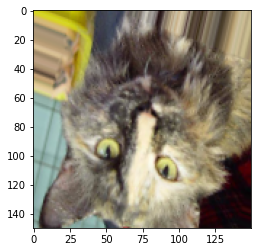

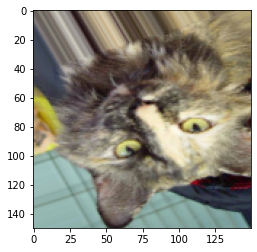

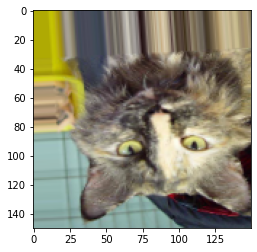

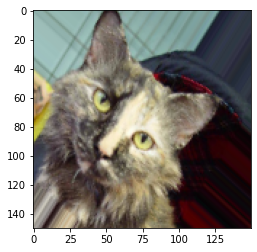

In [63]:
img_path = fnames[10]
img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  
  i += 1
  if i%4 == 0:
    break
plt.show()